In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
NL_t = 0.4
NL_c = 0.01
NL_L = 1.8
NL_mu = 0.3

Me = impact.util.Me
ke = 100*1.0e6
energy = ke+Me
freq = 30*1.0e6
offset = 0.001

turns = 1024

In [3]:
alfaEntrance = np.tan(np.pi*NL_mu)
betaEntrance = NL_L/np.sin(2.0*np.pi*NL_mu)

In [4]:
beam = impact.getBeam()
beam.current = 0.0
beam.kinetic_energy = ke
beam.mass = Me
beam.charge = -1.0
beam.frequency = freq
beam.nCore_y = 1
beam.nCore_z = 1
beam.n_particles = 1

In [5]:
beam.distribution.distribution_type = 'Waterbag'
beam.distribution.betx  = betaEntrance
beam.distribution.alfx  = alfaEntrance
beam.distribution.emitx = 0.0
beam.distribution.bety  = betaEntrance
beam.distribution.alfy  = alfaEntrance
beam.distribution.emity = 0.0
beam.distribution.betz  = 200
beam.distribution.alfz  = 0.0
beam.distribution.emitz = 0.0
beam.distribution.offsetx = offset

In [6]:
beam.mesh.fld_solver = 'Symplectic_Spectral_2D'

In [7]:
lattice = [impact.getElem('loop_through_lattice'),impact.getElem('nonlinear_insert'),impact.getElem('linear_matrix_map')] 
lattice[0].turns=turns
lattice[1].length = NL_L
lattice[1].strength_t = NL_t
lattice[1].transverse_scale_c = NL_c
lattice[1].tune_advance = NL_mu
lattice[1].n_sckick = 100
lattice[2].nonlinear_insert_length = NL_L
lattice[2].nonlinear_insert_tuneAdvance = NL_mu

In [8]:
impact.writeInputFile(beam,lattice)
impact.run(beam)

input error <- sum(beam.multi_charge.n_particles) not qual to beam.n_particles
  ... enforcing  beam.multi_charge.n_particles[0] to beam.n_particles


0

In [9]:
pDataInit = impact.readParticleData(-111110,ke,Me,freq)

In [10]:
print(pDataInit)

[[ 1.00000000e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.95695134e-06 -0.00000000e+00
   1.00000000e+00]]


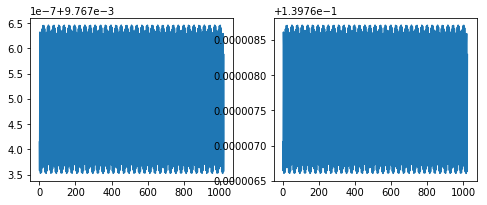

In [11]:
Inv = np.loadtxt('fort.81')
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(Inv[:,1])
plt.subplot(1,2,2)
plt.plot(Inv[:,2])

In [12]:
fort82=np.loadtxt('fort.82')
X = fort82[:,1] + 1j*fort82[:,2]
Y = fort82[:,3] + 1j*fort82[:,4]

In [13]:
tuneX,ampX,X1 = impact.util.naff(2,X)
tuneY,ampY,Y1 = impact.util.naff(2,Y)
print('tuneX=',tuneX)
print('tuneY=',tuneY)

tuneX= [0.59653003 0.40346997]
tuneY= [0.88195381 0.89066113]


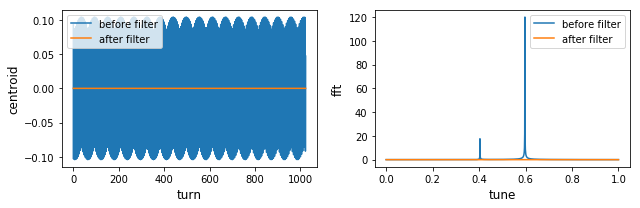

In [14]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(np.real(X))
plt.plot(np.real(X1))
plt.xlabel('turn',fontsize=12);
plt.ylabel('centroid',fontsize=12);
plt.legend(['before filter','after filter'])

plt.subplot(1,2,2)
plt.plot(np.linspace(0,1,turns),np.abs(np.fft.fft(X)))
plt.plot(np.linspace(0,1,turns),np.abs(np.fft.fft(X1)))
plt.xlabel('tune',fontsize=12);
plt.ylabel('fft',fontsize=12);
plt.legend(['before filter','after filter'])

plt.tight_layout()

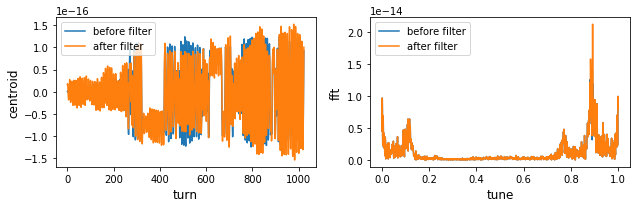

In [15]:
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.plot(np.real(Y))
plt.plot(np.real(Y1))
plt.xlabel('turn',fontsize=12);
plt.ylabel('centroid',fontsize=12);
plt.legend(['before filter','after filter'])

plt.subplot(1,2,2)
plt.plot(np.linspace(0,1,turns),np.abs(np.fft.fft(Y)))
plt.plot(np.linspace(0,1,turns),np.abs(np.fft.fft(Y1)))
plt.xlabel('tune',fontsize=12);
plt.ylabel('fft',fontsize=12);
plt.legend(['before filter','after filter'])

plt.tight_layout()